# Data Frame Description

Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

# Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

# Loading the dataset

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
pd.set_option('display.max_columns',None)
df.head()


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
#checking shape
df.shape

(1000, 40)

Observation:
Total Rows:1000,Total Columns:40

In [4]:
#checking the datatypes
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [5]:
#checking number of unique feature
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

# Checking null values in the dataframe

In [6]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Observation: _c39 is useless feature which has 1000 rows missing.We will drop it in the later stage.

In [7]:
df.isin(['?']).sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

Observation: The columns collison_type,property_damage and police_report_available have missing values present in the form of question mark

In [8]:
#replacing missing value(?) with unknown
df=df.replace('?','Unknown')

In [9]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,Unknown,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,Unknown,0,0,Unknown,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,Unknown,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,Unknown,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,Unknown,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,Unknown,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,Unknown,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,Unknown,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


<AxesSubplot:>

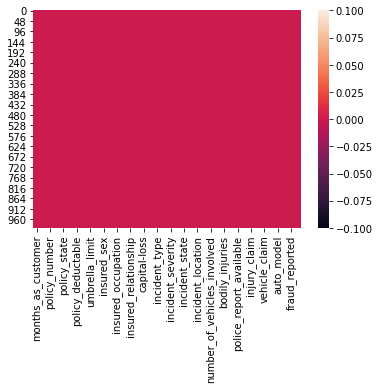

In [10]:
#data visualisation
sns.heatmap(df.isin(['?']))

Observation: Finally we have treated the missing value and no missing value is present.

# Exploratory Data Analysis:

In [11]:
#Extracting month and year of policy bind
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['policy_bind_year']=pd.to_datetime(df['policy_bind_date'],format="%d/%m/%Y").dt.year
df['policy_bind_month']=pd.to_datetime(df['policy_bind_date'],format="%d/%m/%Y").dt.month

In [12]:
#Extracting day,month and year of policy bind
df['incident_date']=pd.to_datetime(df['incident_date'])
df['incident_day']=pd.to_datetime(df['incident_date'],format="%d/%m/%Y").dt.day
df['incident_month']=pd.to_datetime(df['incident_date'],format="%d/%m/%Y").dt.month
df['incident_year']=pd.to_datetime(df['incident_date'],format="%d/%m/%Y").dt.year

In [13]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,policy_bind_year,policy_bind_month,incident_day,incident_month,incident_year
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN,2014,10,25,1,2015
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,Unknown,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,Unknown,0,0,Unknown,5070,780,780,3510,Mercedes,E400,2007,Y,NaN,2006,6,21,1,2015
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN,2000,6,22,2,2015
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-10-01,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,Unknown,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN,1990,5,1,10,2015
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,Unknown,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN,2014,6,17,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,2015-02-22,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,Unknown,87200,17440,8720,61040,Honda,Accord,2006,N,NaN,1991,7,22,2,2015
996,285,41,186934,2014-05-01,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,2015-01-24,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,Unknown,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN,2014,5,24,1,2015
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,2015-01-23,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,Unknown,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN,2003,2,23,1,2015
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,2015-02-26,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,Unknown,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN,2011,11,26,2,2015


In [14]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,policy_bind_year,policy_bind_month,incident_day,incident_month,incident_year
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN,2014,10,25,1,2015
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,Unknown,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,Unknown,0,0,Unknown,5070,780,780,3510,Mercedes,E400,2007,Y,NaN,2006,6,21,1,2015
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN,2000,6,22,2,2015
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-10-01,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,Unknown,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN,1990,5,1,10,2015
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,Unknown,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN,2014,6,17,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,2015-02-22,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,Unknown,87200,17440,8720,61040,Honda,Accord,2006,N,NaN,1991,7,22,2,2015
996,285,41,186934,2014-05-01,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,2015-01-24,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,Unknown,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN,2014,5,24,1,2015
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,2015-01-23,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,Unknown,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN,2003,2,23,1,2015
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,2015-02-26,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,Unknown,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN,2011,11,26,2,2015


In [15]:
#dropping unwanted columns
df.drop(['policy_number','policy_bind_date','insured_hobbies','incident_date','incident_location','_c39','insured_zip'],axis=1,inplace=True)

# Univariate Analysis(Numerical Data):

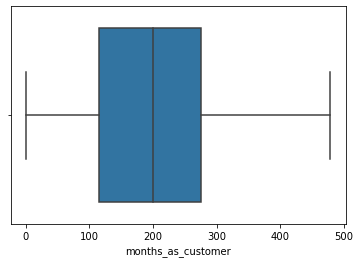

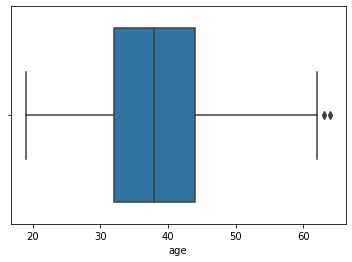

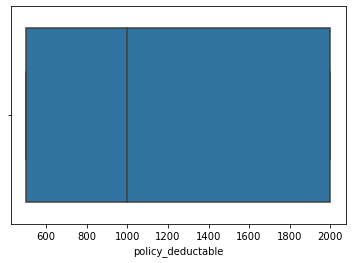

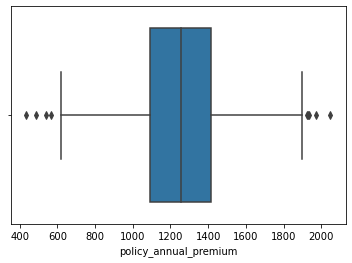

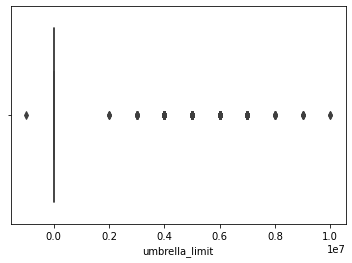

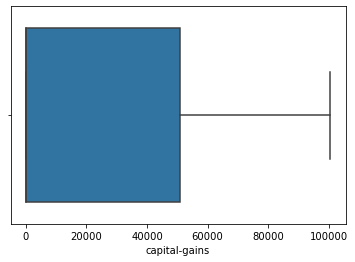

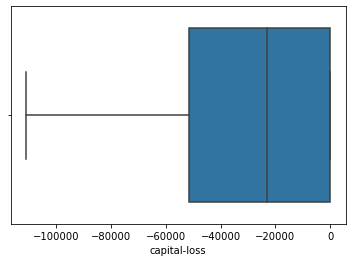

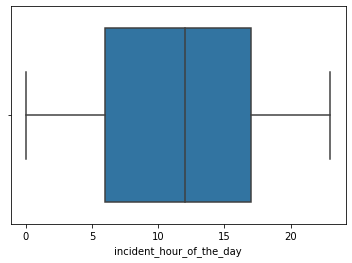

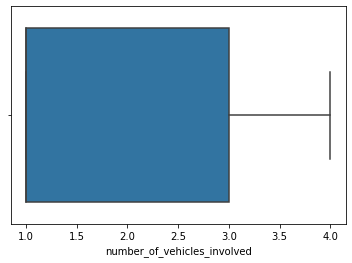

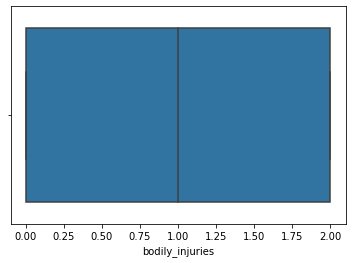

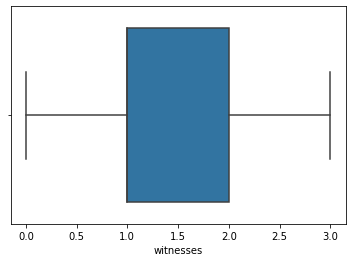

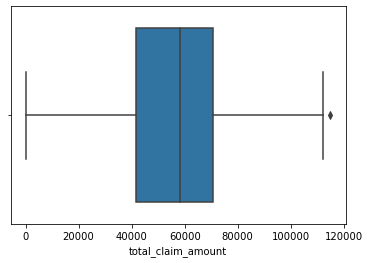

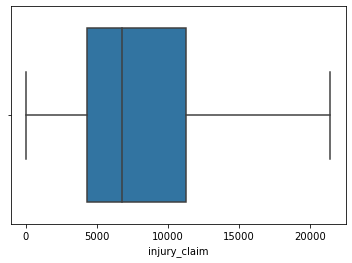

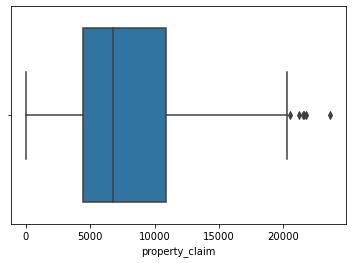

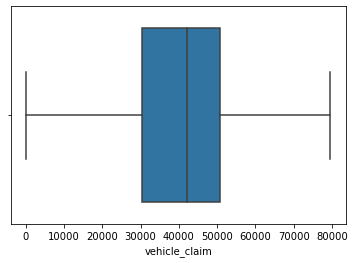

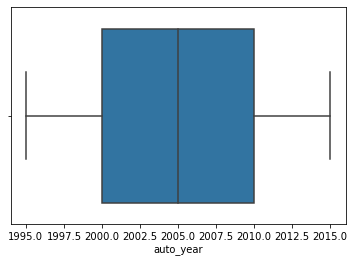

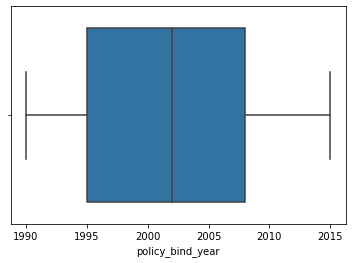

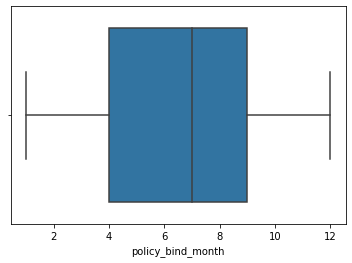

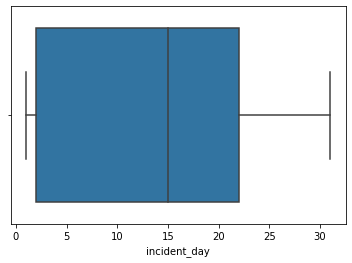

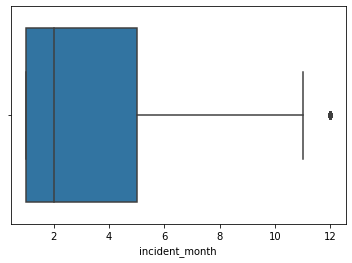

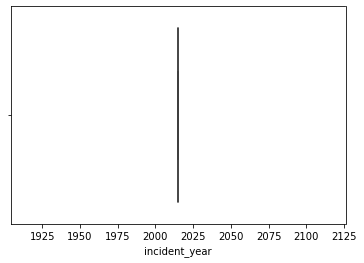

In [16]:
# Univariate Analysis(Numerical Data):
for i in df.columns:
    if (df[i].dtypes=='float')|(df[i].dtypes=='int64'):
        sns.boxplot(df[i])
        plt.show()

Key Observations:
    
1.The maximum age is around 65 and minimum around 18.

2.The maximum policy_deductable is around 2000 and minimum around 500.

3.The insurance company offers maximum policy_annual_premium of around 2000 and minimum around 400.

4.The maximum capital_gains is around 100000.

5.The minimum capital_loss is around -110000.

6.Maximum total_claim_amount is around 120000 and average around 60000.

7.The maximum injury_claim is around 22500 and average around 6000.

8.The maximum property_claim is around 25000 and average around 6000.

9.The maximum injury_claim is around 22500 and average around 6000.

10.The maximum vehicle_claim is around 80000 and average around 42000.

# Univariate Analysis(Categorical Data):

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

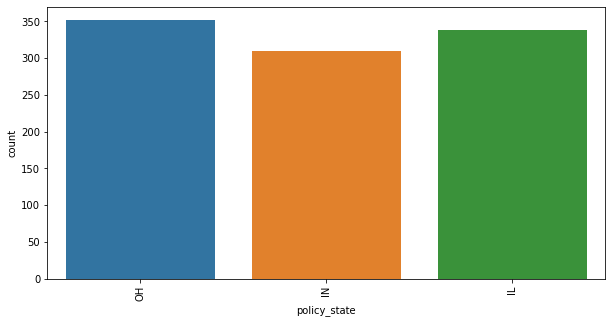

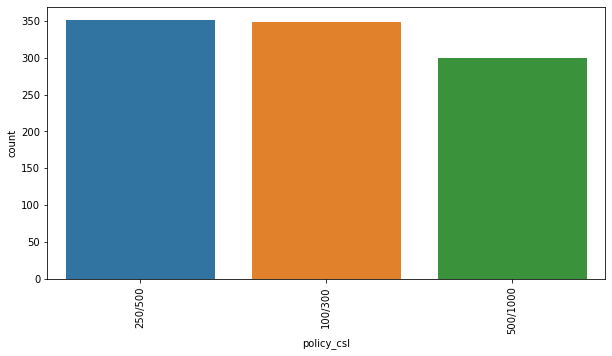

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

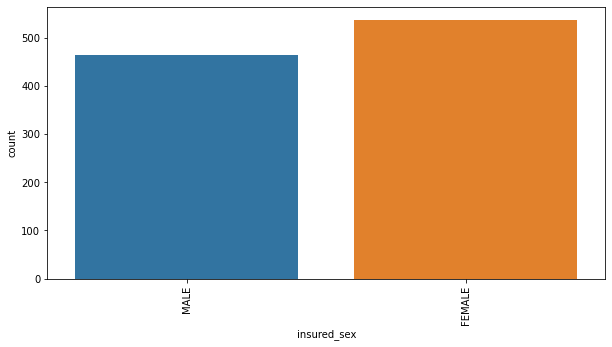

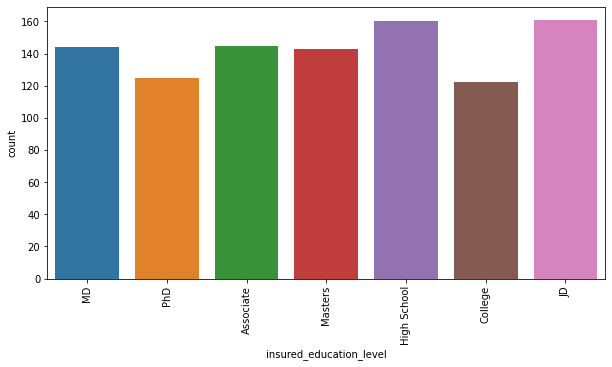

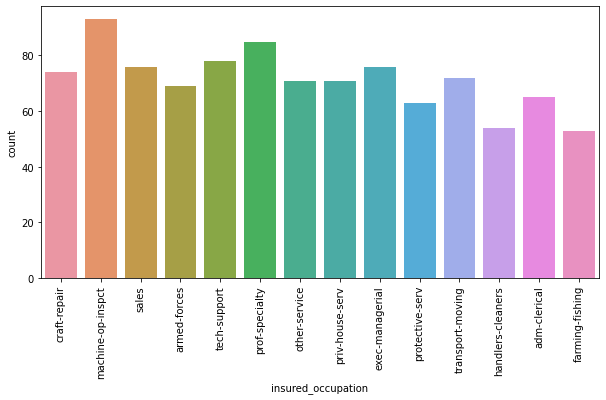

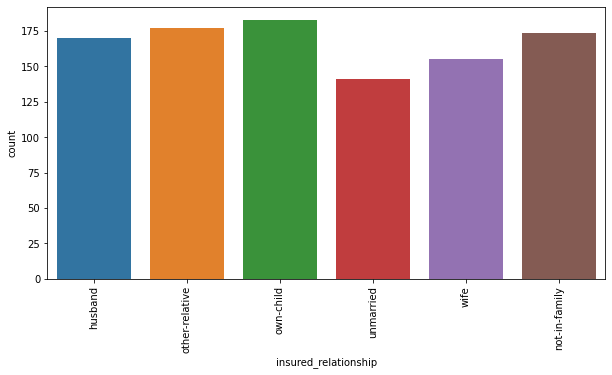

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

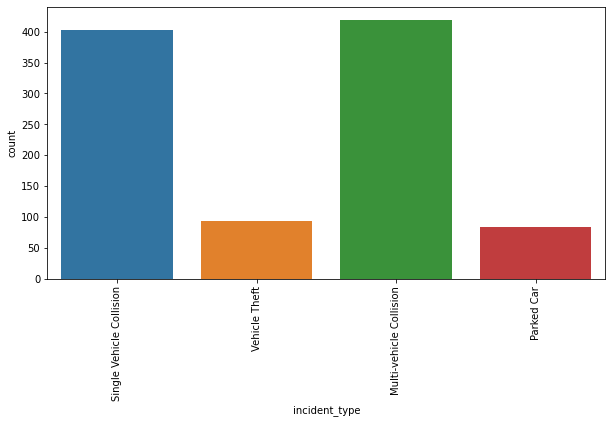

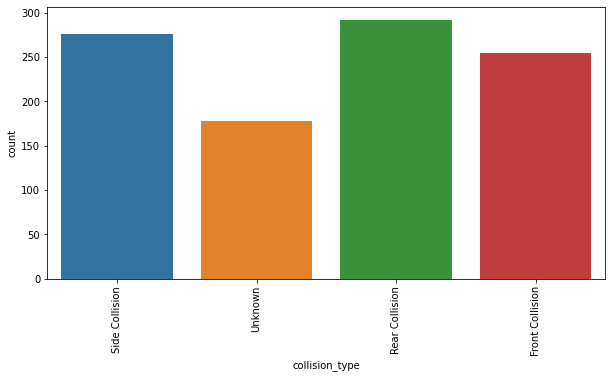

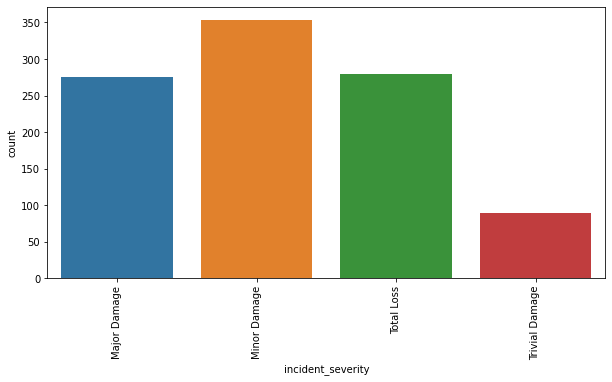

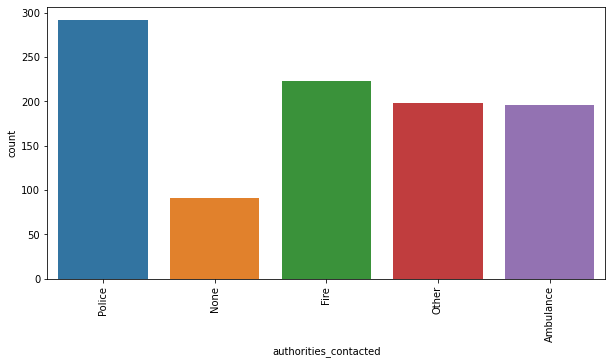

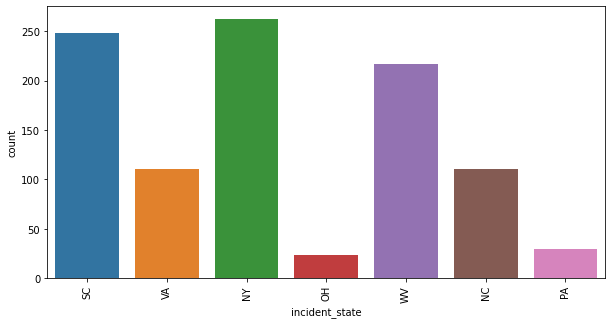

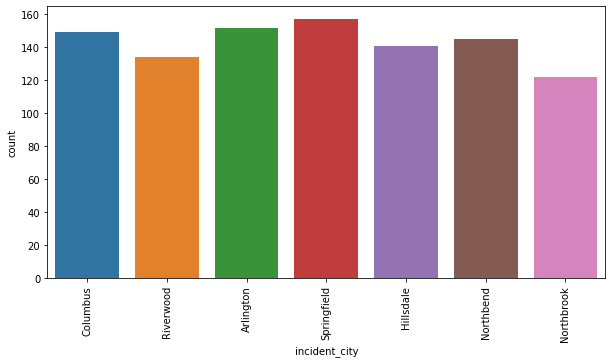

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

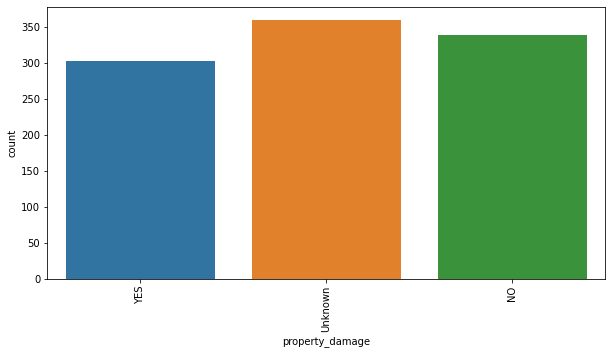

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

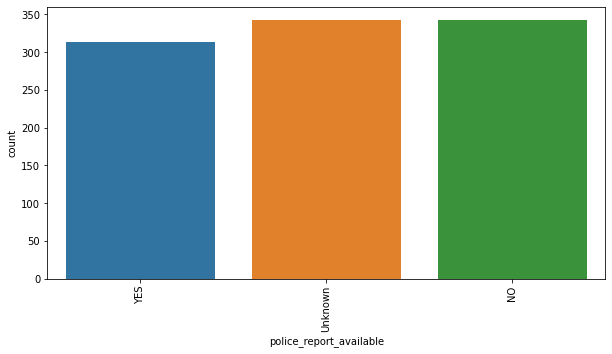

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

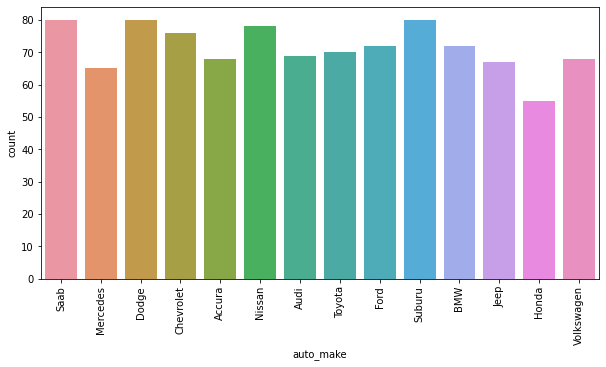

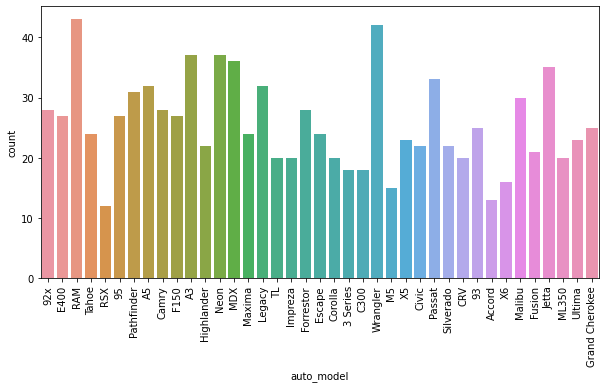

<Figure size 720x360 with 0 Axes>

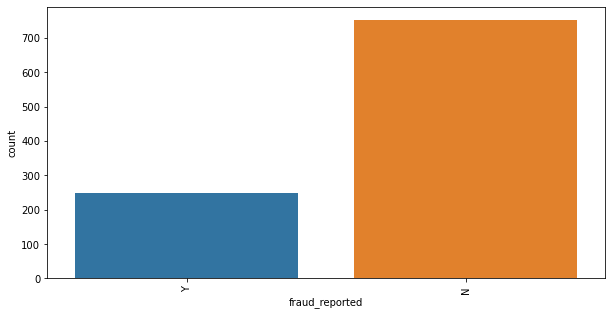

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [17]:
for i in df.columns:
    plt.figure(figsize=(10,5))
    if (df[i].dtypes=='object'):
        plt.xticks(rotation=90)
        sns.countplot(x=i,data=df)
        plt.show()

Observation:
    
1.The majority of customer belong to policy_state OH.

2.The majority of customer has policy_csl as 250/300 and 100/300.

3.Female customers are slightly higher than male.

4.Majority of insured customer have education level High school and JD and there least customer with education level PHD.

5.Majority of insured customer works in the occupation machine-op-inspct followed by prof-speciality and the very customer engaged in farming_fishing.

6.Majority of insured relationship is people who own child.

7.Majority of incident type recorded is single vehicle collision and multi vehicle collision.

8.Majority of collision type recored is side collision and rear collision.

9.Majority of incident severity recorded is major damage.

10.Majority of customer have cantacted the authority police and few have contact ambulance.

11.Majority of incident is recorded in the state NY and in the city springfield.

12.Majority of insurance is recorded for the auto make suburu,nissan,saab and dodge and for the model RAM and wrangler.

13.Majority of insurance claims are not fraud but also there is a high precentage of fraud cases.

# Bivariate Ananlysis:

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

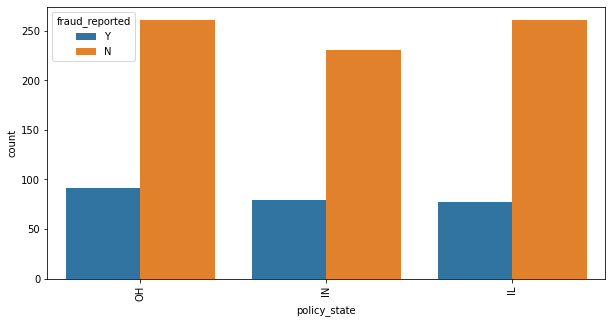

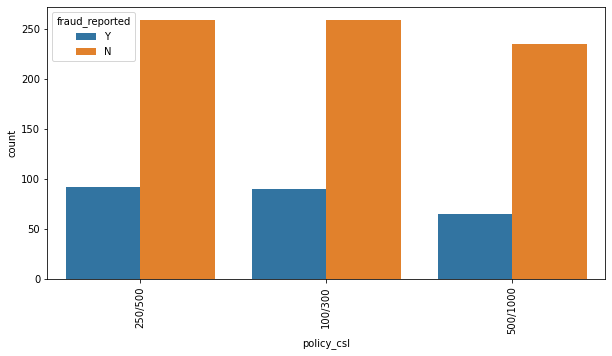

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

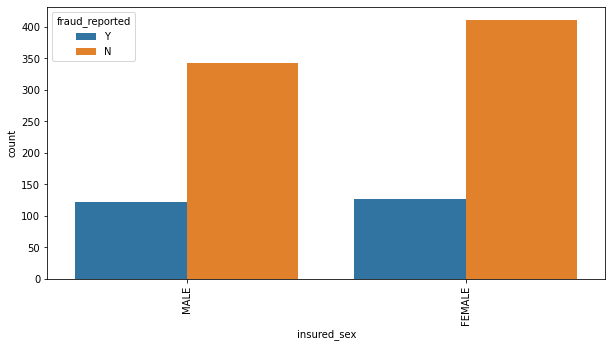

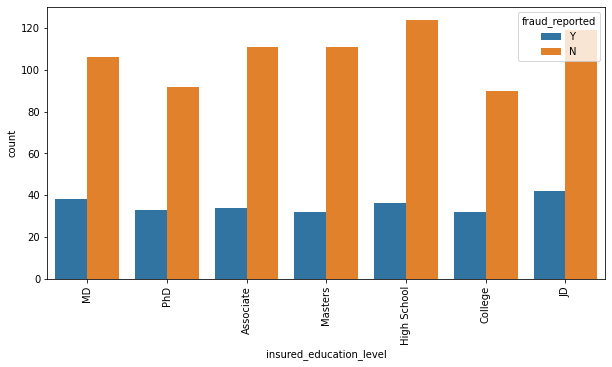

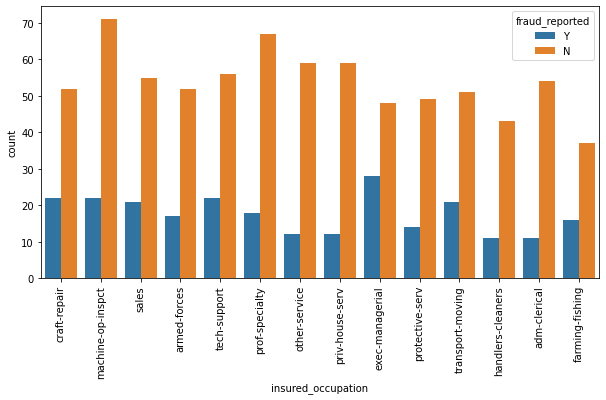

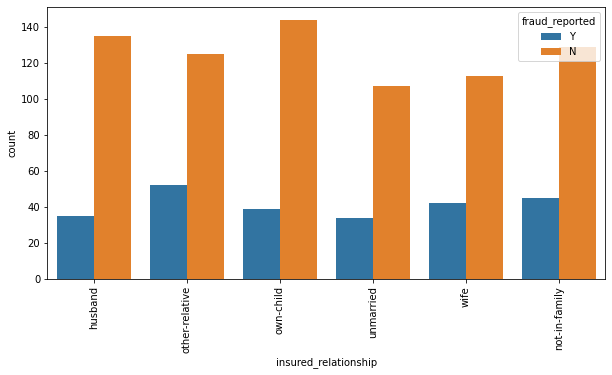

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

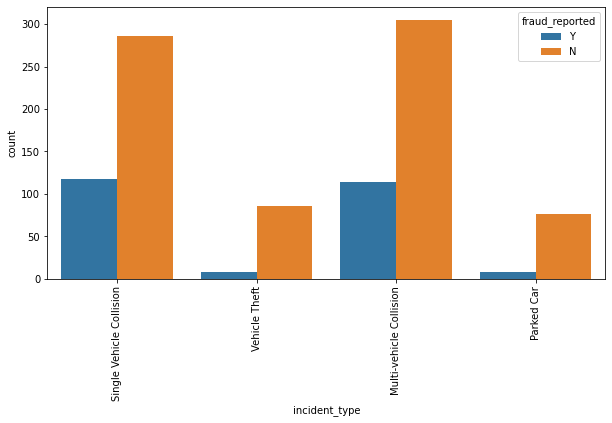

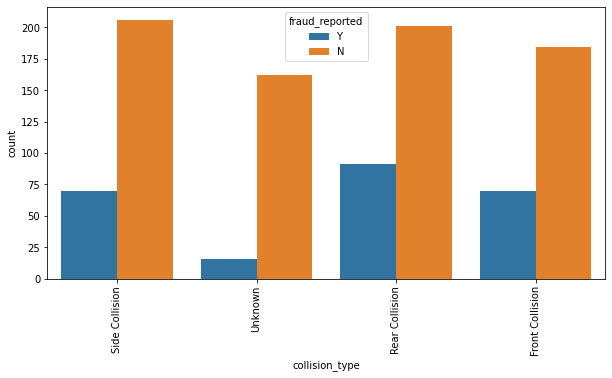

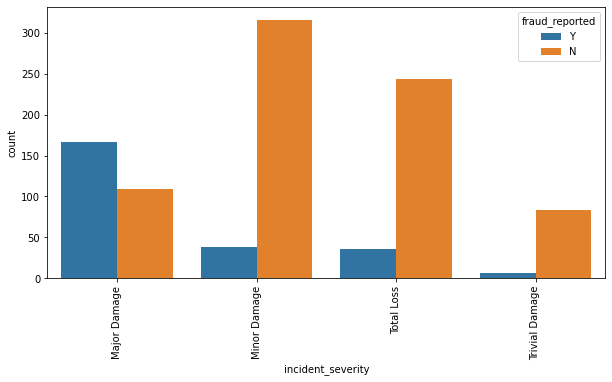

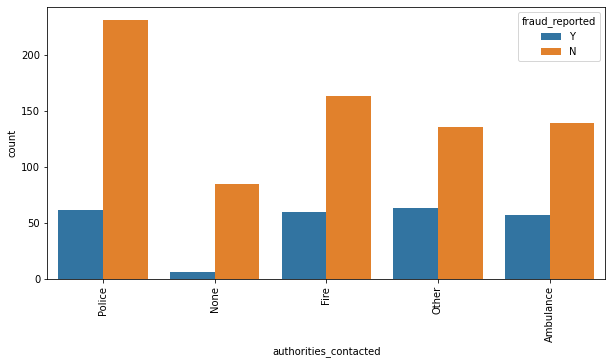

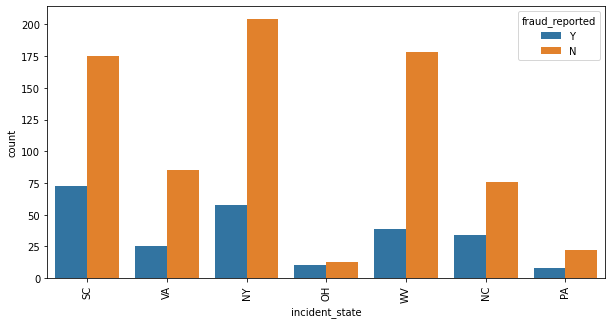

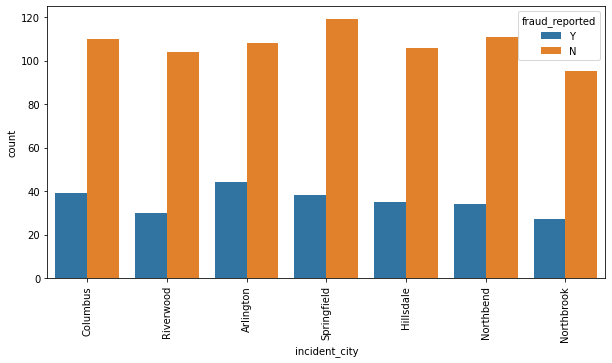

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

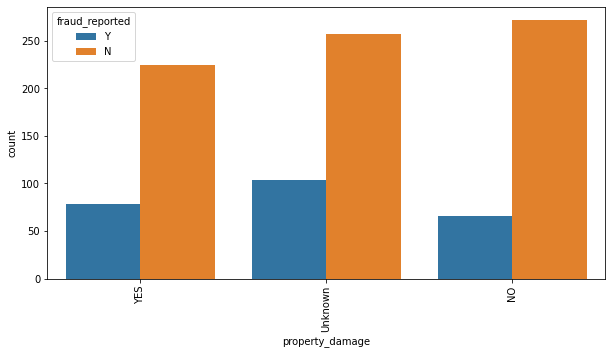

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

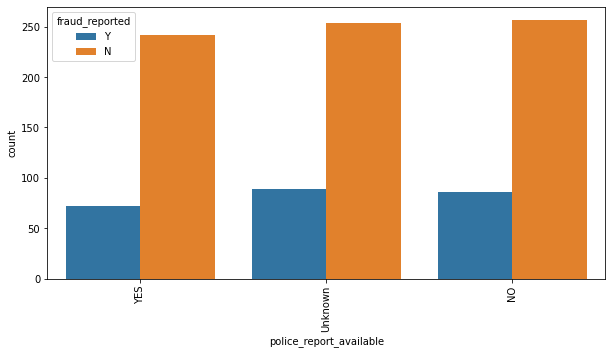

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

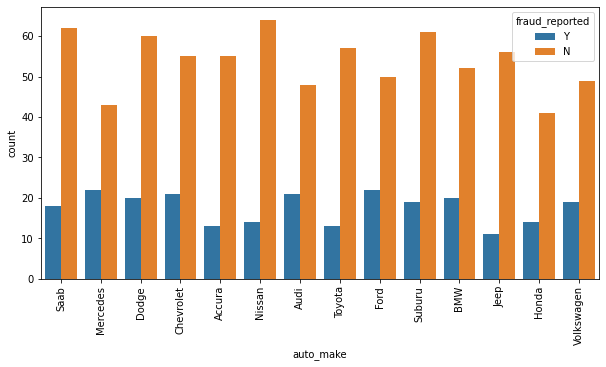

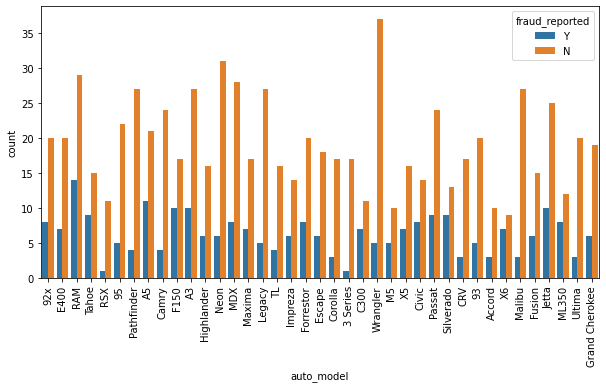

<Figure size 720x360 with 0 Axes>

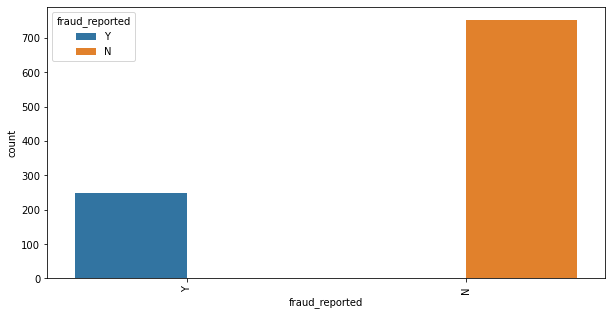

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [18]:
for i in df.columns:
    plt.figure(figsize=(10,5))
    if (df[i].dtypes=='object'):
        plt.xticks(rotation=90)
        sns.countplot(x=i,hue='fraud_reported',data=df)
        plt.show()

In [19]:
# Converting RainToday & RainTommorow to Numerical Data For better EDA
df['fraud_reported']=df['fraud_reported'].replace('Y',1)
df['fraud_reported']=df['fraud_reported'].replace('N',0)

In [20]:
for i in df.columns:
    if (df[i].dtypes=='object'):
        print(pd.crosstab(df[i],df['fraud_reported']).apply(lambda x:round(x/x.sum()*100,1),axis=1))
        print('\n')

fraud_reported     0     1
policy_state              
IL              77.2  22.8
IN              74.5  25.5
OH              74.1  25.9


fraud_reported     0     1
policy_csl                
100/300         74.2  25.8
250/500         73.8  26.2
500/1000        78.3  21.7


fraud_reported     0     1
insured_sex               
FEMALE          76.5  23.5
MALE            73.9  26.1


fraud_reported              0     1
insured_education_level            
Associate                76.6  23.4
College                  73.8  26.2
High School              77.5  22.5
JD                       73.9  26.1
MD                       73.6  26.4
Masters                  77.6  22.4
PhD                      73.6  26.4


fraud_reported         0     1
insured_occupation            
adm-clerical        83.1  16.9
armed-forces        75.4  24.6
craft-repair        70.3  29.7
exec-managerial     63.2  36.8
farming-fishing     69.8  30.2
handlers-cleaners   79.6  20.4
machine-op-inspct   76.3  23.7
other-servi

Observation:

1.All policy state have equal amount of fraud case reported.

2.All policy_csl have equal amount of fraud case reported but slightly higher for 200/500.

3.Male and female have almost equal amount of fraud case reported but male has slightly higher fraud cases reported.

4.All insured education level have almost equal amount of fraud case reported.

5.exec-managerial and farming-fishing are the occupation with high amount of fraud case reported.

6.peopele who have insured relationship other relative have high possibility of being fraud.

7.Single vehicle collision and side collision have possibility of being fraud.

8.People who have reported incident_severity major damage have high possibility of being fraud.

9.The state OH and NC have reported high fraud cases.

10.The city Arlington have reported slightly higher fraud cases.

11.High fraud case is reported for automake Mercedes and for the model ML350,silverado,X6,C300 and F150 very high fraud cases are reported.

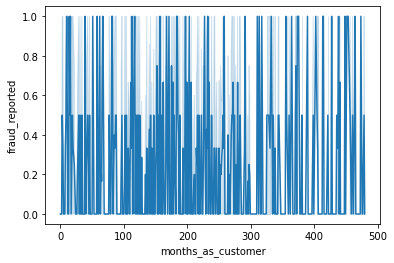

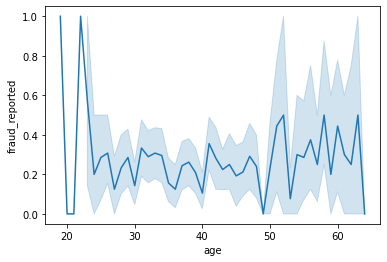

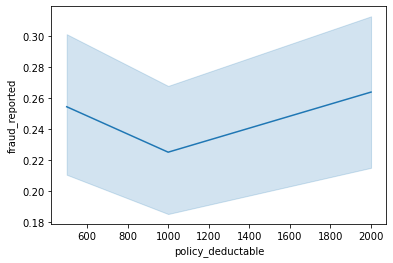

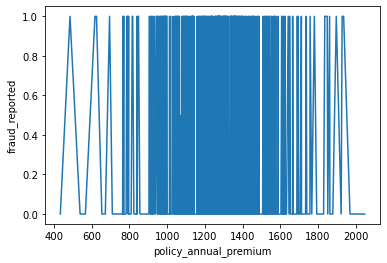

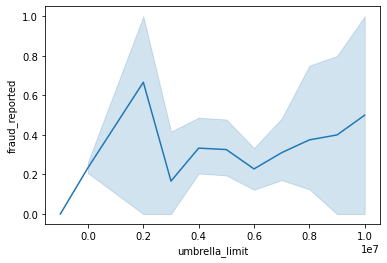

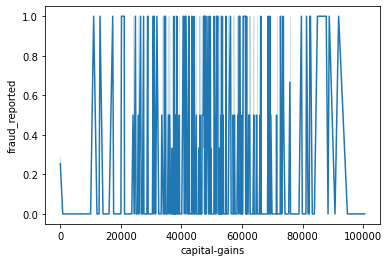

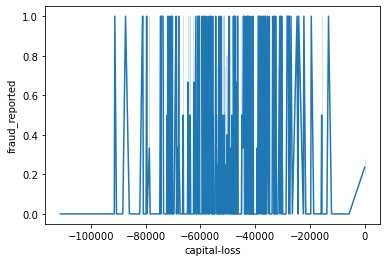

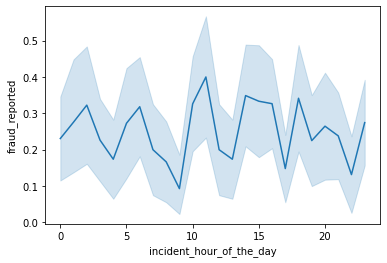

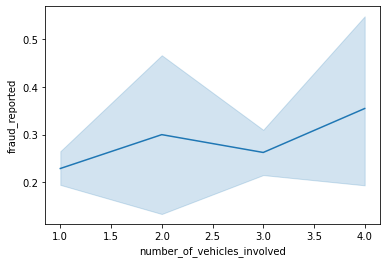

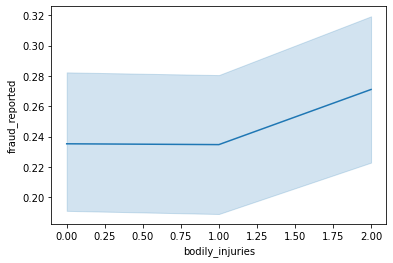

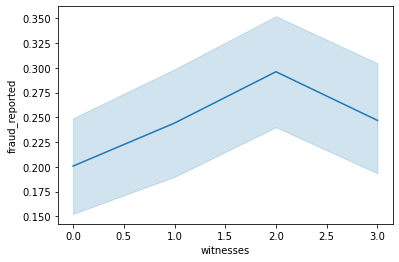

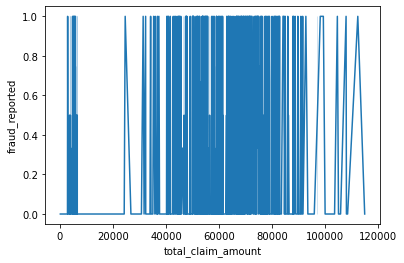

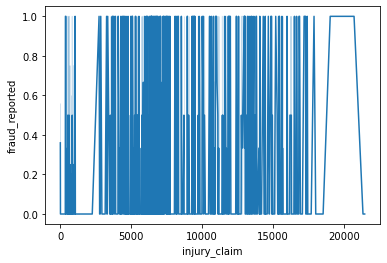

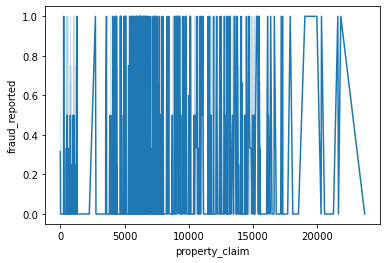

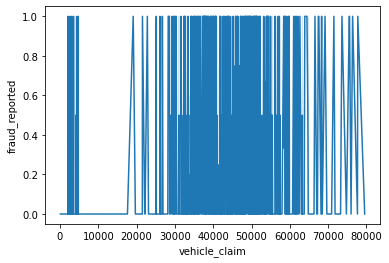

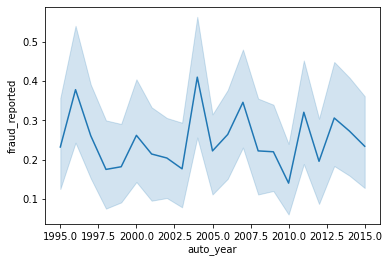

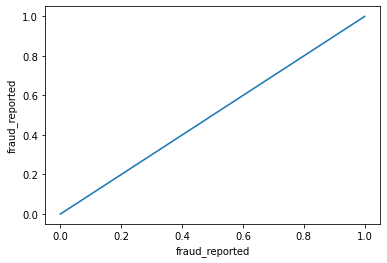

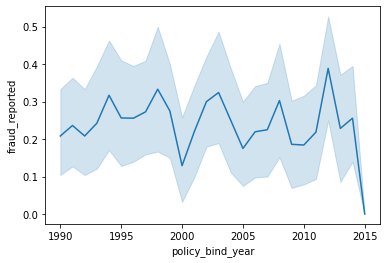

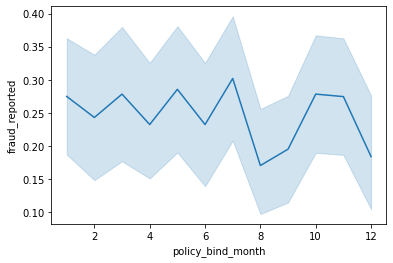

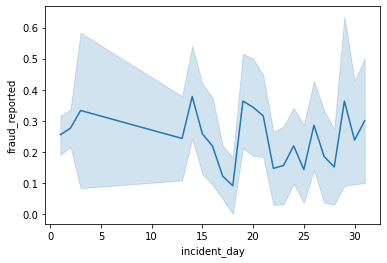

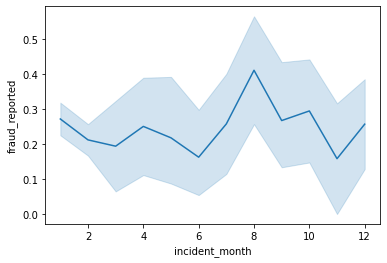

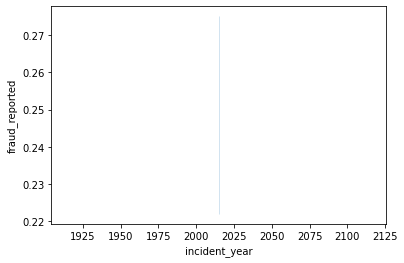

In [21]:
for i in df.columns:
    if (df[i].dtypes=='float')|(df[i].dtypes=='int64'):
        sns.lineplot(x=i,y='fraud_reported',data=df)
        plt.show()    

Observation:

1.There is no clear picture for capital-gains and capital-loss w.r.t fraud reported.

2.Between 10-15 hours there high number of incident reported.

3.With increase of bodily injuries there is possibility of fraud.

In [22]:
#All the incident is reported for the year 2015 so we drop the incident year
df.drop(['incident_year'],axis=1,inplace=True)

# Data Set Description

In [23]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,policy_bind_year,policy_bind_month,incident_day,incident_month
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,0.247000,2001.604000,6.559000,13.08400,3.407000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,0.431483,7.360391,3.391758,10.44318,3.276291
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,0.000000,1990.000000,1.000000,1.00000,1.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,0.000000,1995.000000,4.000000,2.00000,1.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,0.000000,2002.000000,7.000000,15.00000,2.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,0.000000,2008.000000,9.000000,22.00000,5.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,1.000000,2015.000000,12.000000,31.00000,12.000000


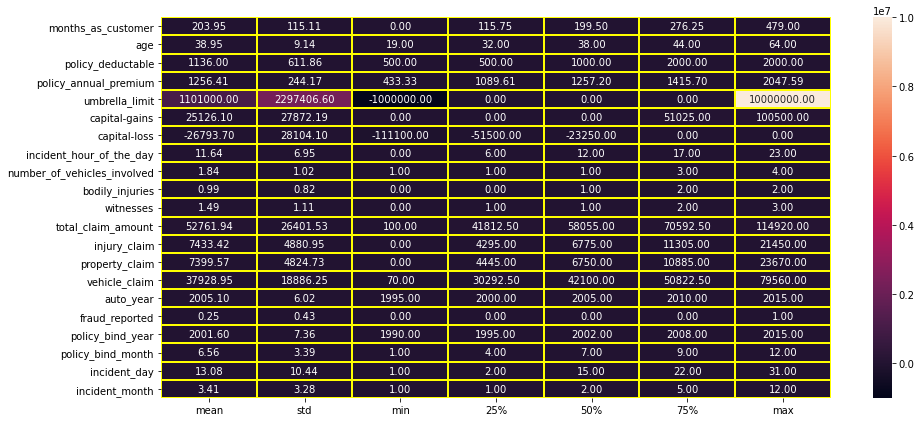

In [24]:
#visualisation
plt.figure(figsize=(15,7))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,linewidth=1,linecolor='yellow',fmt='.2f')
plt.show()

# Correlation

In [25]:
df.corr()['fraud_reported'].sort_values()

incident_day                  -0.044151
policy_bind_month             -0.030829
capital-gains                 -0.019173
capital-loss                  -0.014863
policy_annual_premium         -0.014480
policy_bind_year              -0.000059
incident_hour_of_the_day       0.004316
auto_year                      0.007928
age                            0.012143
incident_month                 0.014495
policy_deductable              0.014817
months_as_customer             0.020544
bodily_injuries                0.033877
witnesses                      0.049497
number_of_vehicles_involved    0.051839
umbrella_limit                 0.058622
injury_claim                   0.090975
property_claim                 0.137835
total_claim_amount             0.163651
vehicle_claim                  0.170049
fraud_reported                 1.000000
Name: fraud_reported, dtype: float64

<AxesSubplot:>

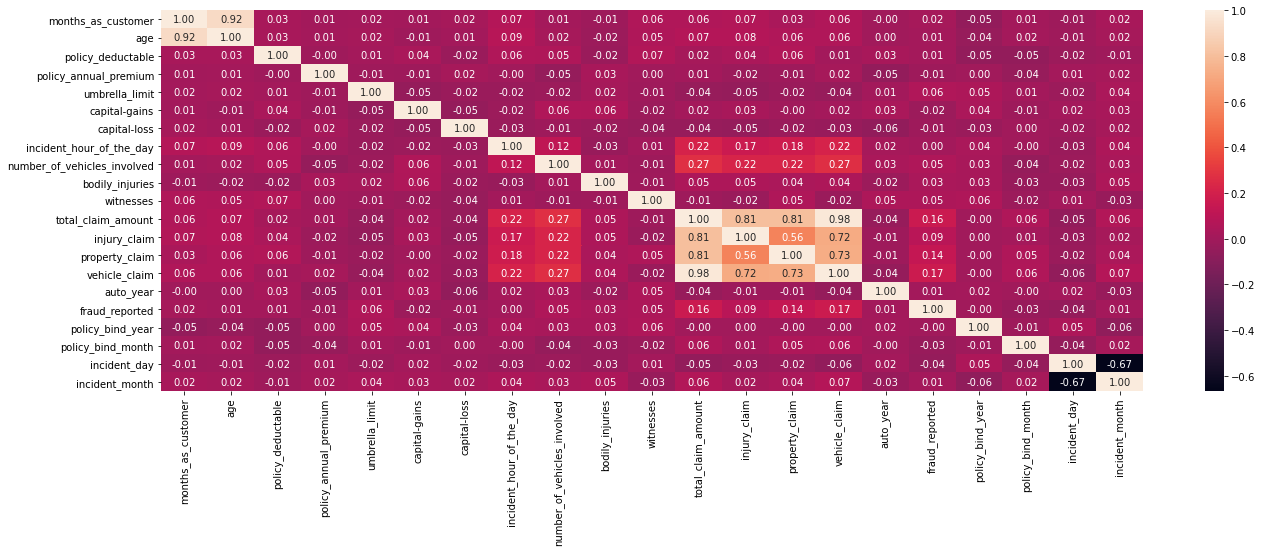

In [26]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linecolor='yellow')

Observation:
    
vehicle_claim is most possitvely correlated feature with the the target and policy_annual_premium is the least correlated.

# Checking Skewness

In [27]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
fraud_reported                 1.175051
policy_bind_year               0.052511
policy_bind_month             -0.029321
incident_day                   0.059111
incident_month                 1.375894
dtype: float64

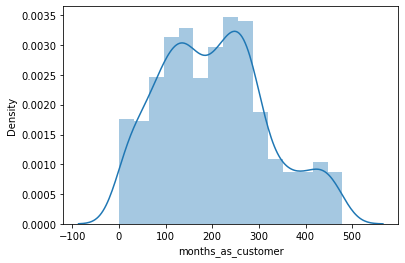

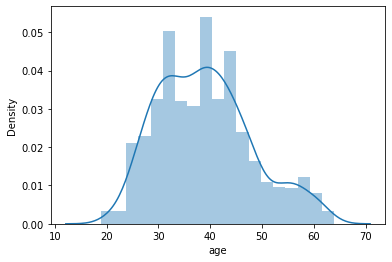

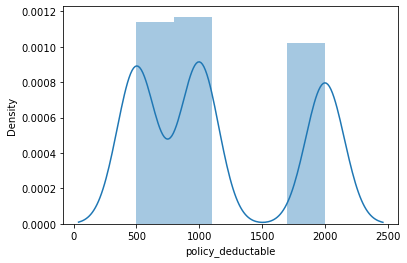

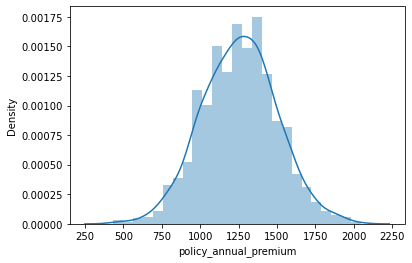

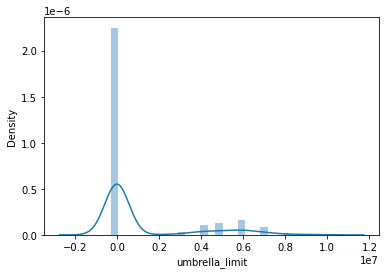

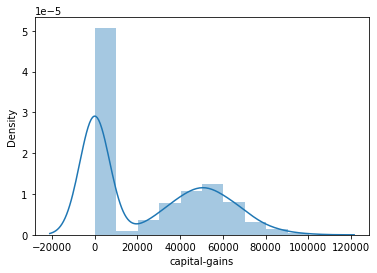

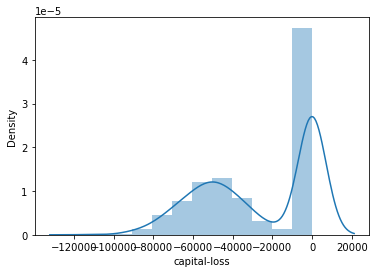

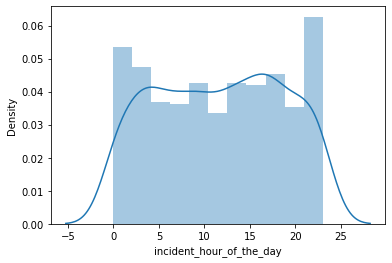

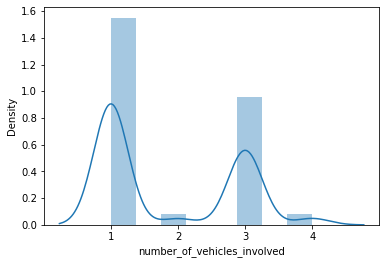

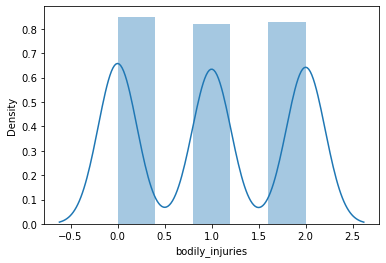

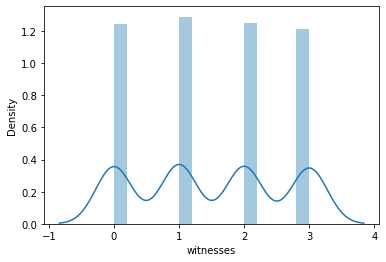

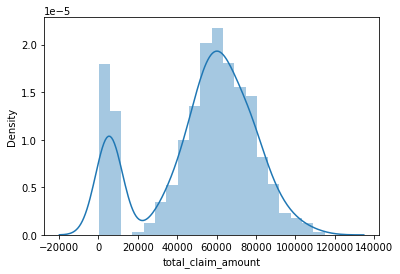

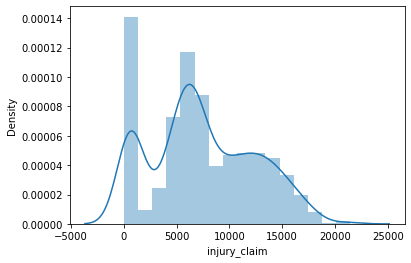

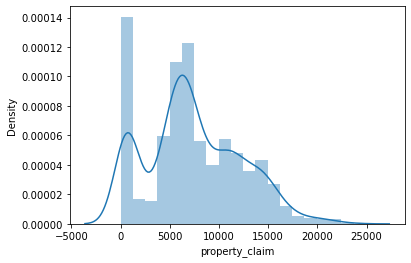

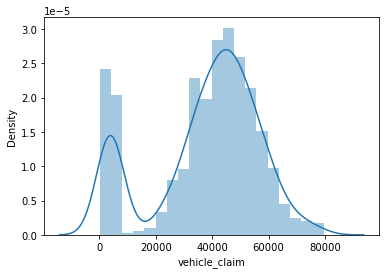

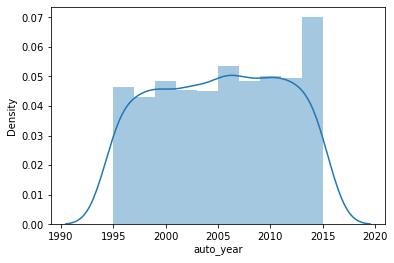

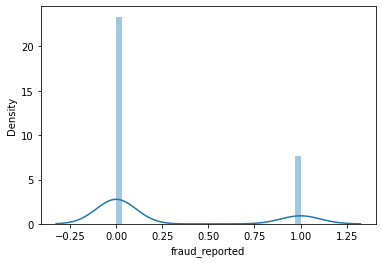

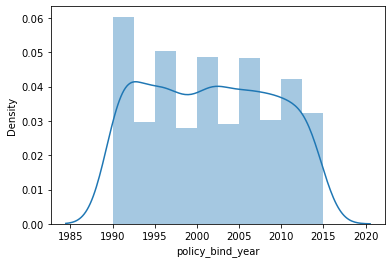

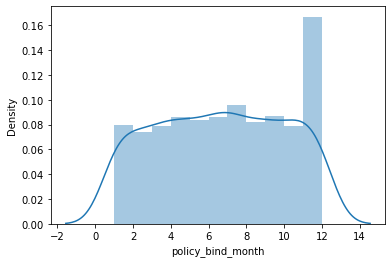

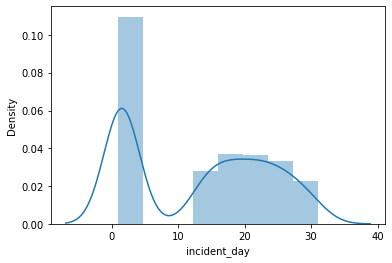

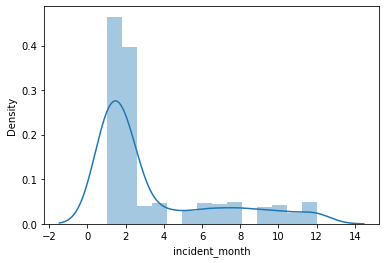

In [28]:
for i in df.columns:
    if (df[i].dtypes=='float')|(df[i].dtypes=='int64'):
        sns.distplot(df[i])
        plt.show()

Observation: All the numerical continuous features are kind of normally distributed or very less skewness present.

# Outliers Checking:

months_as_customer                 AxesSubplot(0.125,0.71587;0.110714x0.16413)
age                             AxesSubplot(0.257857,0.71587;0.110714x0.16413)
policy_deductable               AxesSubplot(0.390714,0.71587;0.110714x0.16413)
policy_annual_premium           AxesSubplot(0.523571,0.71587;0.110714x0.16413)
umbrella_limit                  AxesSubplot(0.656429,0.71587;0.110714x0.16413)
capital-gains                   AxesSubplot(0.789286,0.71587;0.110714x0.16413)
capital-loss                      AxesSubplot(0.125,0.518913;0.110714x0.16413)
incident_hour_of_the_day       AxesSubplot(0.257857,0.518913;0.110714x0.16413)
number_of_vehicles_involved    AxesSubplot(0.390714,0.518913;0.110714x0.16413)
bodily_injuries                AxesSubplot(0.523571,0.518913;0.110714x0.16413)
witnesses                      AxesSubplot(0.656429,0.518913;0.110714x0.16413)
total_claim_amount             AxesSubplot(0.789286,0.518913;0.110714x0.16413)
injury_claim                      AxesSubplot(0.125,

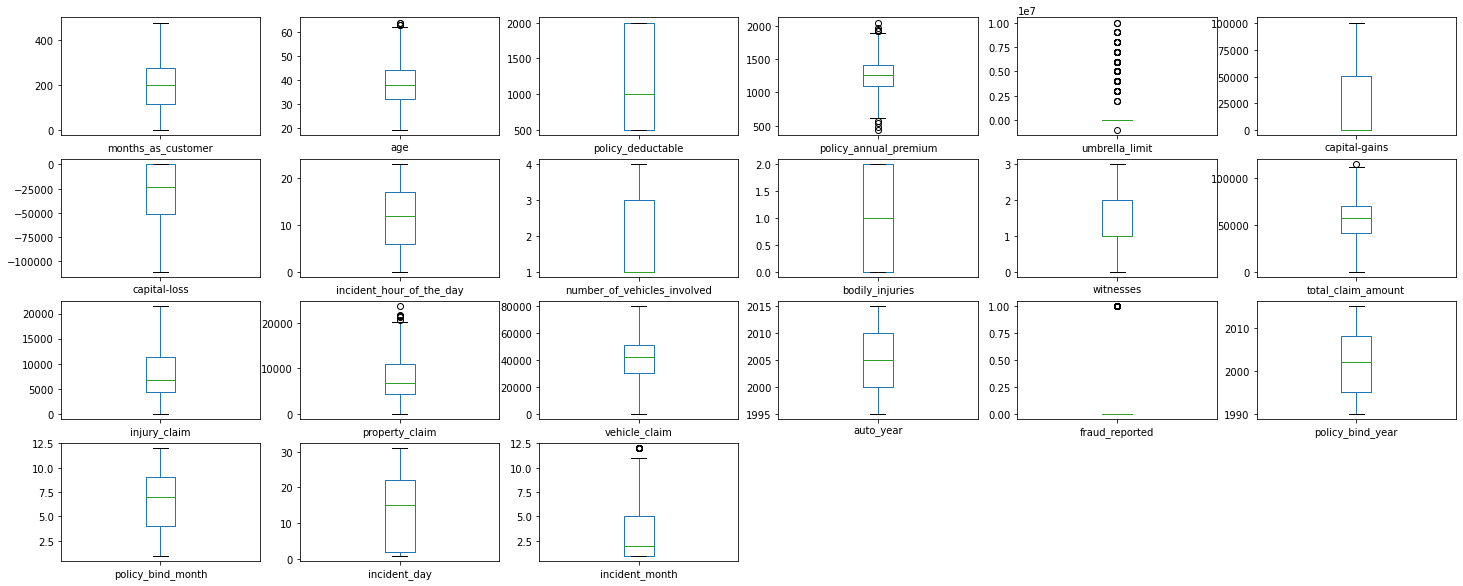

In [29]:
df.plot(kind='box',subplots=True,layout=(4,6),figsize=(25,10))

Observation:Numerical continuous features policy annual premium and policy claim have outliers present.

# Data Preprocessing

# Converting string data to numeric data

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))

In [31]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_year,policy_bind_month,incident_day,incident_month
0,328,48,2,1,1000,1406.91,0,1,4,2,0,53300,0,2,2,0,4,4,1,5,1,2,1,2,2,71610,6510,13020,52080,10,1,2004,1,2014,10,25,1
1,228,42,1,1,2000,1197.22,5000000,1,4,6,2,0,0,3,3,1,4,5,5,8,1,1,0,0,1,5070,780,780,3510,8,12,2007,1,2006,6,21,1
2,134,29,2,0,2000,1413.14,5000000,0,6,11,3,35100,0,0,1,1,4,1,1,7,3,0,2,3,0,34650,7700,3850,23100,4,30,2007,0,2000,6,22,2
3,256,41,0,1,2000,1415.74,6000000,0,6,1,4,48900,-62400,2,0,0,4,2,0,5,1,1,1,2,0,63400,6340,6340,50720,3,34,2014,1,1990,5,1,10
4,228,44,0,2,1000,1583.91,6000000,1,0,11,4,66000,-46000,3,3,1,2,1,0,20,1,0,0,1,0,6500,1300,650,4550,0,31,2009,0,2014,6,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,0,0,5,2,4,0,0,2,0,1,1,0,4,20,1,2,0,1,1,87200,17440,8720,61040,6,6,2006,0,1991,7,22,2
996,285,41,0,0,1000,1436.79,0,0,6,9,5,70900,0,2,1,0,1,4,3,23,1,2,2,3,1,108480,18080,18080,72320,13,28,2015,0,2014,5,24,1
997,130,34,2,1,500,1383.49,3000000,0,5,1,2,35100,0,0,2,1,4,0,0,4,3,1,2,3,2,67500,7500,7500,52500,11,19,1996,0,2003,2,23,1
998,458,62,0,2,2000,1356.92,5000000,1,0,5,5,0,0,2,1,0,3,1,0,2,1,1,0,1,2,46980,5220,5220,36540,1,5,1998,0,2011,11,26,2


# Skewness Treatment:

In [32]:
x=df.drop(['fraud_reported'],axis=1)
y=df['fraud_reported']

In [33]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 1.05127872,  1.00873272,  1.14604754, ...,  1.00350554,
         1.04604418, -1.10045698],
       [ 0.30453584,  0.43143333,  0.0718058 , ..., -0.10929162,
         0.82475977, -1.10045698],
       [-0.51122603, -1.13951302,  1.14604754, ..., -0.10929162,
         0.88243021, -0.02541209],
       ...,
       [-0.54970642, -0.47044379,  1.14604754, ..., -1.38085875,
         0.93846168, -1.10045698],
       [ 1.9126537 ,  2.13055434, -1.25937435, ...,  1.26666954,
         1.09778562, -0.02541209],
       [ 1.90009963,  1.98572613,  1.14604754, ...,  1.26666954,
         1.09778562, -0.02541209]])

In [34]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)
x

array([[0.7769837 , 0.75464753, 1.        , ..., 0.84066816, 0.88867284,
        0.        ],
       [0.60911735, 0.64244311, 0.55340818, ..., 0.5007354 , 0.80459437,
        0.        ],
       [0.42573566, 0.33711257, 1.        , ..., 0.5007354 , 0.82650663,
        0.391477  ],
       ...,
       [0.41708534, 0.46715347, 1.        , ..., 0.11230224, 0.84779616,
        0.        ],
       [0.97061913, 0.97268579, 0.        , ..., 0.92105843, 0.90833235,
        0.391477  ],
       [0.967797  , 0.94453685, 1.        , ..., 0.92105843, 0.90833235,
        0.391477  ]])

# Balancing the dataset

In [35]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [36]:
y.value_counts()

0    753
1    753
Name: fraud_reported, dtype: int64

# Model Building:

In [38]:
# Since our outcome has only two variable we will use binary classification model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print('At random state',i,'The model performs very well')
        print('Training Accuracy Score is:',round(accuracy_score(y_train,pred_train)*100,1))
        print('Testing Accuracy Score is:',round(accuracy_score(y_test,pred_test)*100,1))
        print('\n')

At random state 69 The model performs very well
Training Accuracy Score is: 78.5
Testing Accuracy Score is: 78.5


At random state 196 The model performs very well
Training Accuracy Score is: 77.8
Testing Accuracy Score is: 77.8


At random state 213 The model performs very well
Training Accuracy Score is: 78.5
Testing Accuracy Score is: 78.5


At random state 262 The model performs very well
Training Accuracy Score is: 78.8
Testing Accuracy Score is: 78.8


At random state 290 The model performs very well
Training Accuracy Score is: 77.8
Testing Accuracy Score is: 77.8


At random state 408 The model performs very well
Training Accuracy Score is: 78.5
Testing Accuracy Score is: 78.5


At random state 418 The model performs very well
Training Accuracy Score is: 77.8
Testing Accuracy Score is: 77.8


At random state 847 The model performs very well
Training Accuracy Score is: 78.5
Testing Accuracy Score is: 78.5


At random state 878 The model performs very well
Training Accuracy Score 

In [39]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Logistic Regression Model

In [40]:
#selecting random state=262
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=262,test_size=0.20)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
print('Training Accuracy Score is:',round(accuracy_score(y_train,pred_train)*100,1))
print('Testing Accuracy Score is:',round(accuracy_score(y_test,pred_test)*100,1))

Training Accuracy Score is: 78.8
Testing Accuracy Score is: 78.8


# CROSS VALIDATION OF THE MODEL

In [41]:
from sklearn.model_selection import cross_val_score
for k in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=k)
    cv_mean=cv_score.mean()
    print('At crossfold=',k,'the cv score is',cv_mean)
    print('training score :',accuracy_score(y_train,pred_train))
    print('testing score :',accuracy_score(y_test,pred_test))
    print('\n')

At crossfold= 2 the cv score is 0.7589641434262948
training score : 0.7882059800664452
testing score : 0.7880794701986755


At crossfold= 3 the cv score is 0.7662682602921645
training score : 0.7882059800664452
testing score : 0.7880794701986755


At crossfold= 4 the cv score is 0.7676364354647554
training score : 0.7882059800664452
testing score : 0.7880794701986755


At crossfold= 5 the cv score is 0.7722624364700447
training score : 0.7882059800664452
testing score : 0.7880794701986755


At crossfold= 6 the cv score is 0.7715803452855247
training score : 0.7882059800664452
testing score : 0.7880794701986755


At crossfold= 7 the cv score is 0.7682693490833027
training score : 0.7882059800664452
testing score : 0.7880794701986755


At crossfold= 8 the cv score is 0.7716354272205336
training score : 0.7882059800664452
testing score : 0.7880794701986755


At crossfold= 9 the cv score is 0.7722649938218801
training score : 0.7882059800664452
testing score : 0.7880794701986755




In [42]:
#selecting cv=5 
model=[DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),XGBClassifier()]
for i in model:
    i.fit(x_train,y_train)
    ipred=i.predict(x_test)
    i.score(x_train,y_train)
    print(i)
    print('accuracy score:',accuracy_score(y_test,ipred))
    cv_score=cross_val_score(i,x,y,cv=5)
    cv_mean=cv_score.mean()
    print('the cv score is',cv_mean)
    print(confusion_matrix(y_test,ipred))
    print(classification_report(y_test,ipred))
    print('\n')

DecisionTreeClassifier()
accuracy score: 0.8211920529801324
the cv score is 0.7822820179974038
[[123  21]
 [ 33 125]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       144
           1       0.86      0.79      0.82       158

    accuracy                           0.82       302
   macro avg       0.82      0.82      0.82       302
weighted avg       0.82      0.82      0.82       302



KNeighborsClassifier()
accuracy score: 0.7185430463576159
the cv score is 0.7144991309322127
[[ 63  81]
 [  4 154]]
              precision    recall  f1-score   support

           0       0.94      0.44      0.60       144
           1       0.66      0.97      0.78       158

    accuracy                           0.72       302
   macro avg       0.80      0.71      0.69       302
weighted avg       0.79      0.72      0.69       302



SVC()
accuracy score: 0.8576158940397351
the cv score is 0.8632527337132296
[[129  15]
 [ 28 130]]
         

# HYPER PARAMETER TUNING USING GRID SEARCH CV

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
#tuning random forest model
from sklearn.ensemble import RandomForestClassifier
parameters={'n_estimators':[100,200,300,350],'max_features':['auto','sqrt','log2'],'max_depth':[5,10]}
rf=RandomForestClassifier()
rfg=GridSearchCV(rf,parameters)
rfg.fit(x_train,y_train)
print(rfg.best_params_)

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 300}


In [55]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=300,max_features='auto',max_depth=10)
rf.fit(x_train,y_train)
rfpred=rf.predict(x_test)
rf.score(x_train,y_train)
print('accuracy score:',accuracy_score(y_test,rfpred))
cv_score=cross_val_score(rf,x,y,cv=8)
cv_mean=cv_score.mean()
print('the cv score is',cv_mean)
print(confusion_matrix(y_test,rfpred))
print(classification_report(y_test,rfpred))

accuracy score: 0.9072847682119205
the cv score is 0.8746728301249578
[[135   9]
 [ 19 139]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       144
           1       0.94      0.88      0.91       158

    accuracy                           0.91       302
   macro avg       0.91      0.91      0.91       302
weighted avg       0.91      0.91      0.91       302



In [46]:
#tuning gradient boosting model
grid_param={'n_estimators':[100,150,200,250,300],'learning_rate':[0.1,0.01,0.001,1,10,100]}
model=GradientBoostingClassifier()
grid=GridSearchCV(estimator=model,param_grid=grid_param,scoring='accuracy',cv=8)
grid.fit(x,y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.criterion)
print(grid.best_params_)

GridSearchCV(cv=8, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 1, 10, 100],
                         'n_estimators': [100, 150, 200, 250, 300]},
             scoring='accuracy')
0.865427642688281
friedman_mse
{'learning_rate': 0.1, 'n_estimators': 100}


In [56]:
gb=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1)    
gb.fit(x_train,y_train)
gbpred=gb.predict(x_test)
gb.score(x_train,y_train)
print('accuracy score:',accuracy_score(y_test,gbpred))
cv_score=cross_val_score(gb,x,y,cv=8)
cv_mean=cv_score.mean()
print('the cv score is',cv_mean)
print(confusion_matrix(y_test,gbpred))
print(classification_report(y_test,gbpred))

accuracy score: 0.8874172185430463
the cv score is 0.8667539119666778
[[133  11]
 [ 23 135]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.89       144
           1       0.92      0.85      0.89       158

    accuracy                           0.89       302
   macro avg       0.89      0.89      0.89       302
weighted avg       0.89      0.89      0.89       302



In [48]:
#tuning xgboost model
parameters={'booster':['gbtree','gblinear'],'max_depth':[5,10],'learning_rate':[0.1,0.001,1,10],'n_estimators':[100,200,300,350]}
xgc=XGBClassifier()
xgcg=GridSearchCV(xgc,parameters)
xgcg.fit(x_train,y_train)
print(xgcg.best_params_)

[21:40:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:40:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:40:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:40:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [57]:
xgc=XGBClassifier(n_estimators=100,learning_rate=0.1,booster='gbtree',max_depth=5)
xgc.fit(x_train,y_train)
xgcpred=xgc.predict(x_test)
xgc.score(x_train,y_train)
cv_score=cross_val_score(xgc,x,y,cv=8)
print('accuracy score:',accuracy_score(y_test,xgcpred))
cv_mean=cv_score.mean()
print('The CV score is:',cv_mean)
print(confusion_matrix(y_test,xgcpred))
print(classification_report(y_test,xgcpred))
    

[21:53:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:53:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:53:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:53:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [50]:
#tuning SVC
parameters={'C': [0.1, 1, 10,100], 
'gamma': [1, 0.1, 0.01],
'kernel': ['rbf','poly','linear']}
svc=SVC()
svc=GridSearchCV(svc,parameters)
svc.fit(x_train,y_train)
print(svc.best_params_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [51]:
svc=SVC(C=10,kernel='rbf',gamma=1)
svc.fit(x_train,y_train)
svcpred=svc.predict(x_test)
svc.score(x_train,y_train)
print('accuracy score:',accuracy_score(y_test,svcpred))
cv_score=cross_val_score(svc,x,y,cv=8)
cv_mean=cv_score.mean()
print('the cv score is',cv_mean)
print(confusion_matrix(y_test,svcpred))
print(classification_report(y_test,svcpred))

accuracy score: 0.956953642384106
the cv score is 0.9695133963750985
[[143   1]
 [ 12 146]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       144
           1       0.99      0.92      0.96       158

    accuracy                           0.96       302
   macro avg       0.96      0.96      0.96       302
weighted avg       0.96      0.96      0.96       302



# CONCLUSION:

Selecting SVC as our final model as the model is performing extremely well having cv score and testing score almost equal.

# ROC AUC CURVE

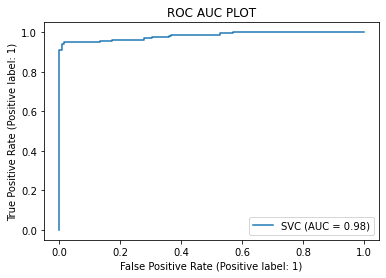

In [52]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svc,x_test,y_test)
plt.title('ROC AUC PLOT')
plt.show()

AUC sore is 98%

In [58]:
original=np.array(y_test)
predicted=np.array(svcpred)
df_com=pd.DataFrame({'Original':original,'Predicted':predicted},index=range(len(original)))
df_com.sample(10)

,Original,Predicted
25,1,0
180,0,0
264,0,0
27,0,0
207,1,1
147,1,1
144,0,0
169,0,0
282,1,1
1,0,0


# SAVING BEST MODEL

In [54]:
import joblib
joblib.dump(svc,'svcfile.obj')

['svcfile.obj']